In [22]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import pipeline
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download stop words set once
stop_words = set(stopwords.words('english'))  # Create set of stop words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df = pd.read_csv("wine_review.csv")
df.head()

,review
0,Easily the best Sauvignon Blanc I've had to da...
1,"Excellent, Mockingbird Inn?\n"
2,Absolutely incredible. One of the best sauvign...
3,Reported in nytimes. Did not try
4,Great. Much different than other Sauv Blancs s...


In [26]:
df.isna().sum() #Check if there are null values

review    0
dtype: int64

In [27]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [28]:
def remove_stop_words(text):
    if pd.isna(text):
        return ""
    words = text.split()  # tokenize text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [29]:
def clean_review(text):
    
    #Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    #Remove weird characters except useful punctuation
    text = re.sub(r"[^a-zA-Z0-9.,'\"?!\s]", '', text)

    #Normalize multiple whitespaces/newlines
    text = re.sub(r'\s+', ' ', text)

    text = text.lower()   

    text = remove_stop_words(text)

    return text.strip()

# Apply cleaning
df["review"] = df["review"].astype(str).apply(clean_review)

In [30]:
df["review"]

0      easily best sauvignon blanc date. beautiful ar...
1                            excellent, mockingbird inn?
2      absolutely incredible. one best sauvignon blan...
3                                  reported nytimes. try
4      great. much different sauv blancs since aged o...
                             ...                        
495    pretty good sauv blanc. crisp acidic would ima...
496    outstanding sauv blanc rocked us. full bodied,...
497    benchmark sauvignon blanc! perfect condition d...
498                                     pear lemon flint
499    told merry edwards hated making wine. bad clea...
Name: review, Length: 500, dtype: object

In [31]:
# Initialize zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define your custom labels for classification
labels = [
    "food combinations",
    "taste",
    "value for money",
    "other"
]


Device set to use cpu


In [32]:
sample_df = df.sample(50, random_state=42).copy()
sample_df['review'] = sample_df['review'].apply(clean_review)

tqdm.pandas()

sample_df['talks_about'] = sample_df['review'].progress_apply(lambda x: classifier(x, labels)['labels'][0])


100%|██████████| 50/50 [02:18<00:00,  2.78s/it]


In [33]:
sample_df["talks_about"]

361                taste
73                 taste
374                taste
155                taste
104      value for money
394                taste
377                other
124                taste
68     food combinations
450                taste
9                  taste
194                taste
406                taste
84                 taste
371                taste
388                taste
495                taste
30                 taste
316    food combinations
408                taste
490    food combinations
491                taste
280                other
356                taste
76     food combinations
461    food combinations
497      value for money
211                taste
101                taste
334                taste
475                taste
336                taste
440    food combinations
173                taste
2                  taste
333                other
409                taste
70                 taste
209    food combinations
63                 taste


In [34]:
sample_df.head(20)

,review,talks_about
361,beautiful sav blanc. distinguished palate,taste
73,color light yellow viscosity high aromas mango...,taste
374,drinking amazing right now. wow!,taste
155,pineapples creamy.,taste
104,"clean, pure, balanced. wellintegrated fruit. c...",value for money
394,"big round, tropical fruits, melon, pear, super...",taste
377,ins great! quite different.,other
124,"absolutely amazing burst citrus notes honey, a...",taste
68,citrus oak pear peach melon cream butter lemon...,food combinations
450,aromas rich peachy fruits floral notes. creamy...,taste


In [35]:
# Add progress bar for visibility using tqdm
tqdm.pandas()

# Apply the function to the DataFrame
df["talks_about"] = df["review"].progress_apply(lambda x: classifier(x, labels)['labels'][0])


100%|██████████| 500/500 [23:32<00:00,  2.82s/it]


In [36]:
df.head(20)

,review,talks_about
0,easily best sauvignon blanc date. beautiful ar...,value for money
1,"excellent, mockingbird inn?",value for money
2,absolutely incredible. one best sauvignon blan...,taste
3,reported nytimes. try,other
4,great. much different sauv blancs since aged o...,other
5,"nice, balanced, svb. enough apple citrus, ligh...",taste
6,"oak stone first, followed little peach. finish...",value for money
7,"stunning, delicious, sophisticated, incomparab...",taste
8,fantastic expression napa sav blanc. incredibl...,taste
9,"think first cali sauvignon blanc. fruity, hone...",taste


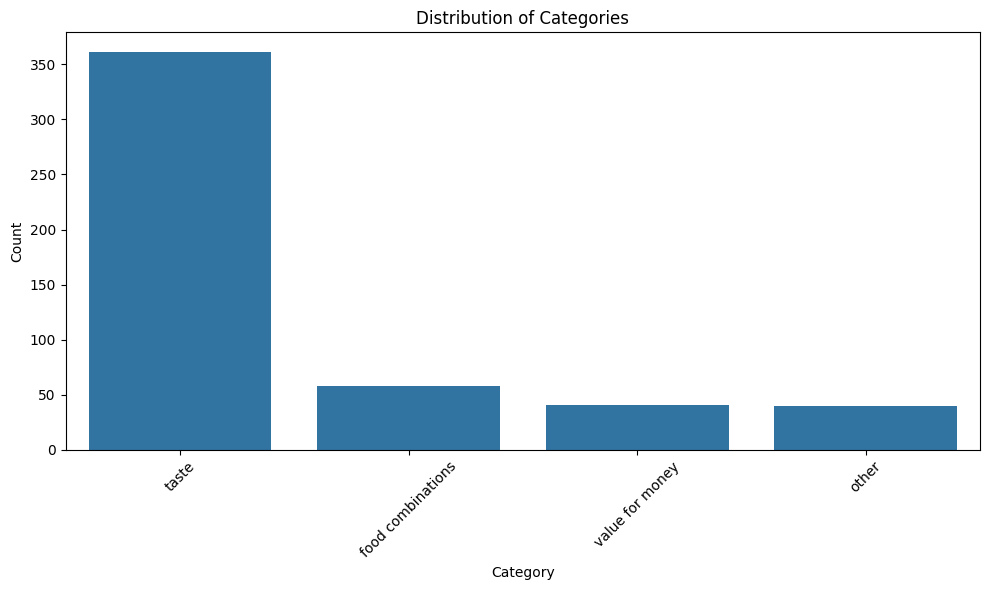

In [38]:
# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='talks_about', order=df['talks_about'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import os
os.makedirs("Outputs", exist_ok=True)  # Create folder if it doesn't exist
df.to_csv(os.path.join("Outputs", "Updated Wine Reviews.csv"), index=False)
